In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
from soilgasflux_fcs import multiprocess_raw_data, json_reader, fcs
from soilgasflux_fcs import synthetic_postProcessing
import pathlib

In [97]:
data_path = pathlib.Path('../data/synthetical/data62/test')
a = json_reader.Initializer(folderPath=data_path)
df = a.prepare_rawdata()
for i in df['id'].unique():
    df_i = df[df['id'] == i]

In [98]:
a_fcs = fcs.FCS(df_data=df_i, chamber_id='test')
a_fcs.settings(moving_window=True, window_walk=10, min_window_size=20, 
               min_deadband=0, max_deadband=60)

a_fcs.run(n='test',metadata={'area':314, 'volume':6283})

{'test': {'deadband': array([ 0, 10, 20, 30, 40, 50]),
  'cutoff': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
         150, 160, 170]),
  'dcdt(HM)': array([[0.88631278,        nan,        nan,        nan,        nan,
                 nan],
         [0.99726753, 1.09339509,        nan,        nan,        nan,
                 nan],
         [0.99921351, 0.65423409, 0.49097009,        nan,        nan,
                 nan],
         [0.936382  , 0.6374512 , 0.60202945, 0.62197468,        nan,
                 nan],
         [0.77620917, 0.63758139, 0.6359287 , 0.66477156, 0.82424858,
                 nan],
         [0.73508849, 0.66213857, 0.67265789, 0.69534737, 0.7418394 ,
          0.70343982],
         [0.70401718, 0.66318455, 0.66840017, 0.6739461 , 0.67650418,
          0.68051296],
         [0.69858717, 0.6760269 , 0.68125908, 0.68601125, 0.68915621,
          0.68786238],
         [0.70348479, 0.69170807, 0.69659183, 0.70072164, 0.70348842,
         

In [108]:
a = multiprocess_raw_data.Multiprocessor()
b = a.run(df=df, chamber_id='test')

Multiprocessing started
CPU core count: 8


Date: 2024-11-20


/Users/alexnaokiasatokobayashi/opt/anaconda3/envs/Peat/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/alexnaokiasatokobayashi/opt/anaconda3/envs/Peat/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/alexnaokiasatokobayashi/opt/anaconda3/envs/Peat/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Processing ID: 2024-11-20_0-20-37Processing ID:
 2024-11-20_0-20-39
Processing ID: 2024-11-20_0-20-38
Results: dict_keys(['2024-11-20_0-20-37'])
Results: dict_keys(['2024-11-20_0-20-39'])
Results: dict_keys(['2024-11-20_0-20-38'])
[0, 10, 20, 30, 40, 50] [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]
NetCDF file saved


In [109]:
a = multiprocess_raw_data.Multiprocessor()
b = a.run_MC(df=df, chamber_id='test_mc')

Multiprocessing started
CPU core count: 8
Date: 2024-11-20


/Users/alexnaokiasatokobayashi/opt/anaconda3/envs/Peat/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/alexnaokiasatokobayashi/opt/anaconda3/envs/Peat/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/alexnaokiasatokobayashi/opt/anaconda3/envs/Peat/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Processing ID: 2024-11-20_0-20-38
Processing ID: 2024-11-20_0-20-37
Processing ID: 2024-11-20_0-20-39
ERROR HM ####
unsupported operand type(s) for *: 'NoneType' and 'float'
ERROR HM ####
unsupported operand type(s) for *: 'NoneType' and 'float'
Shape of dcdt(HM): (16, 6, 100)
Results: dict_keys(['2024-11-20_0-20-37'])
ERROR HM ####
unsupported operand type(s) for *: 'NoneType' and 'float'
Shape of dcdt(HM): (16, 6, 100)
Results: dict_keys(['2024-11-20_0-20-39'])
ERROR HM ####
unsupported operand type(s) for *: 'NoneType' and 'float'
Shape of dcdt(HM): (16, 6, 100)
Results: dict_keys(['2024-11-20_0-20-38'])
[0, 10, 20, 30, 40, 50] [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]
NetCDF file saved


In [ ]:
expected_synthetic = synthetic_postProcessing.Synthetic(processed_data='./output/test_2024-11-20.nc',
                                                      raw_dataFolder=data_path)
expected_results = expected_synthetic.get_expectedResults()

test_2024-11-20.nc
Synthetic initialized


/Users/alexnaokiasatokobayashi/opt/anaconda3/envs/Peat/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [11]:
expected_results

<xarray.Dataset> Size: 2kB
Dimensions:       (time: 11, cutoff: 16)
Coordinates:
  * time          (time) datetime64[ns] 88B 2024-11-20T00:20:37 ... 2024-11-2...
  * cutoff        (cutoff) int64 128B 20 30 40 50 60 70 ... 130 140 150 160 170
Data variables:
    dcdt(HM)      (time, cutoff) float64 1kB 0.8833 0.8693 ... 0.7382 0.7258
    deadband      (time) int64 88B 30 30 30 30 30 30 30 30 30 30 30
    d_intensity   (time) int64 88B -20 -5 -10 -20 -5 -10 -20 -5 -10 -20 -5
    d_startpoint  (time) int64 88B 30 30 30 30 30 30 30 30 30 30 30
    add_noise     (time) bool 11B True True True True ... True True True True

In [134]:
b

<xarray.Dataset> Size: 51kB
Dimensions:       (time: 11, cutoff: 16, deadband: 6)
Coordinates:
  * time          (time) datetime64[ns] 88B 2024-11-20T00:20:37 ... 2024-11-2...
  * deadband      (deadband) int64 48B 0 10 20 30 40 50
  * cutoff        (cutoff) int64 128B 20 30 40 50 60 70 ... 130 140 150 160 170
Data variables:
    dcdt(HM)      (time, cutoff, deadband) float64 8kB 0.8774 nan ... 0.7873
    dcdt(linear)  (time, cutoff, deadband) float64 8kB 0.641 nan ... 0.8442
    AIC(HM)       (time, cutoff, deadband) float64 8kB 18.04 nan ... -149.1
    AIC(linear)   (time, cutoff, deadband) float64 8kB 37.93 nan ... 351.2 324.1
    RMSE(HM)      (time, cutoff, deadband) float64 8kB 1.223 nan ... 0.5154
    RMSE(linear)  (time, cutoff, deadband) float64 8kB 2.01 nan ... 3.714 3.701

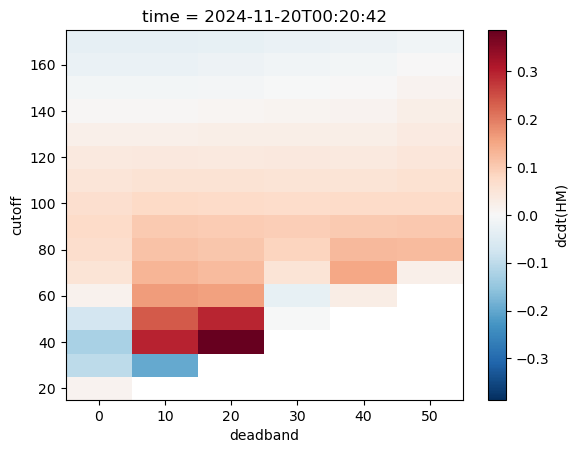

In [158]:
(expected_results['dcdt(HM)']-b['dcdt(HM)']).isel(time=5).plot()

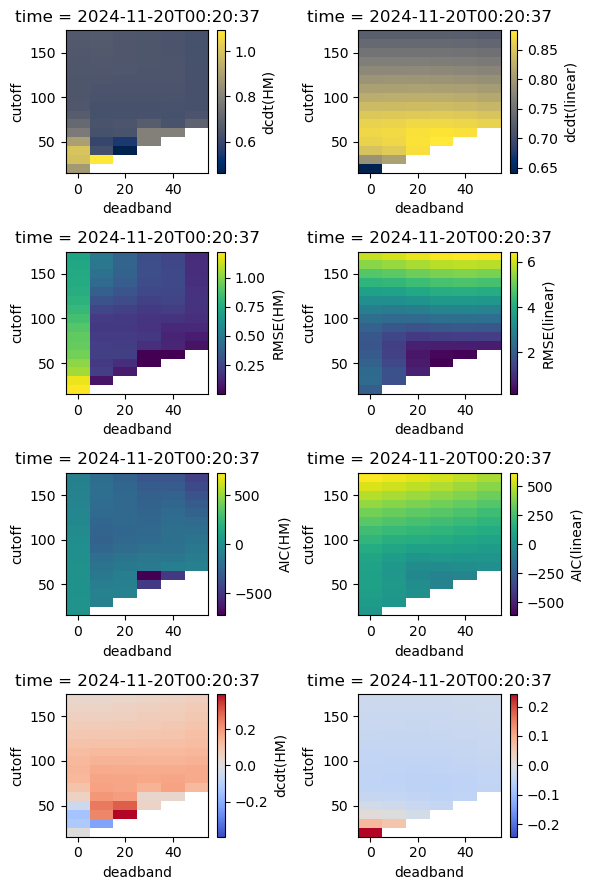

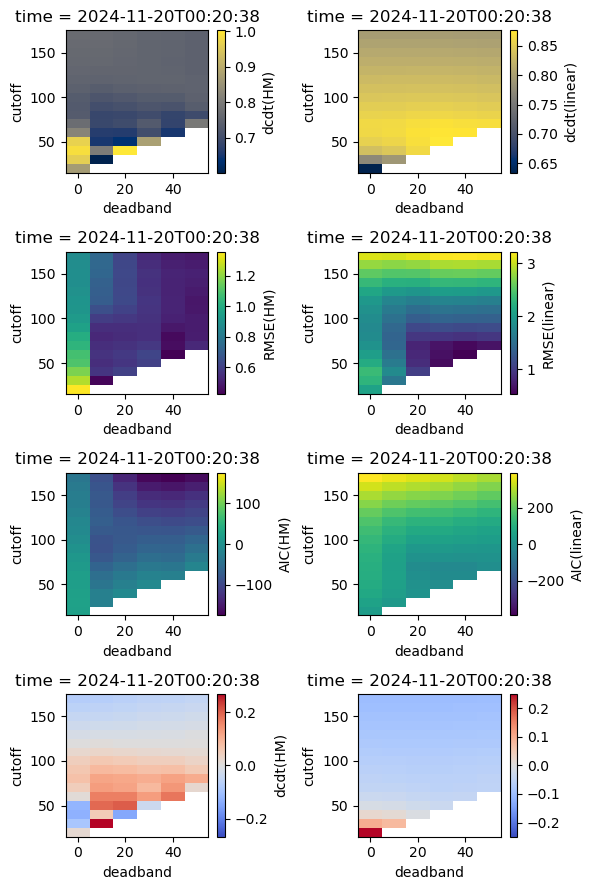

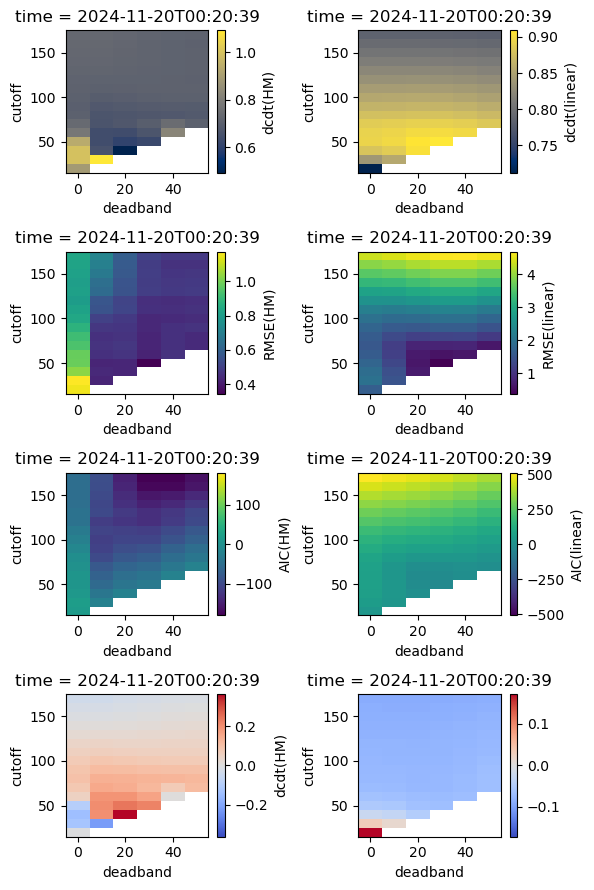

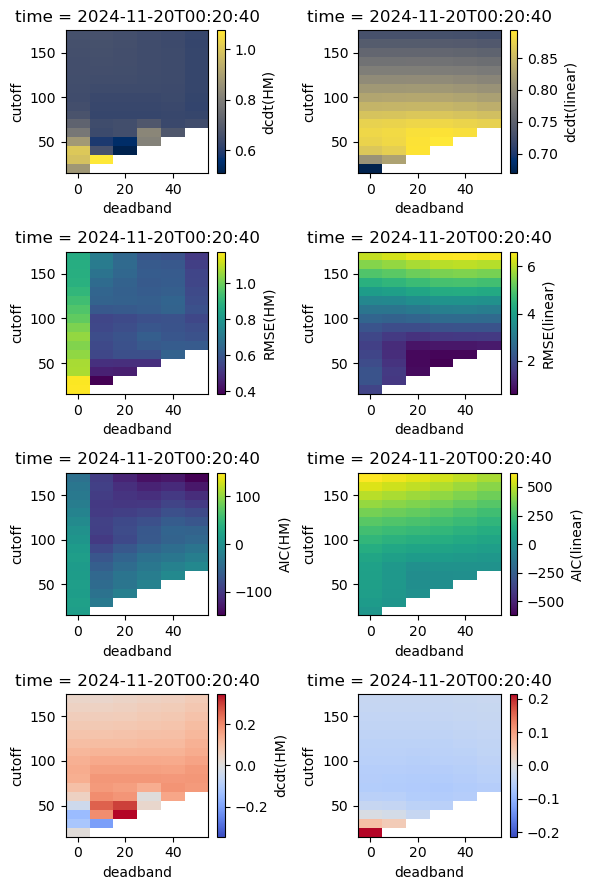

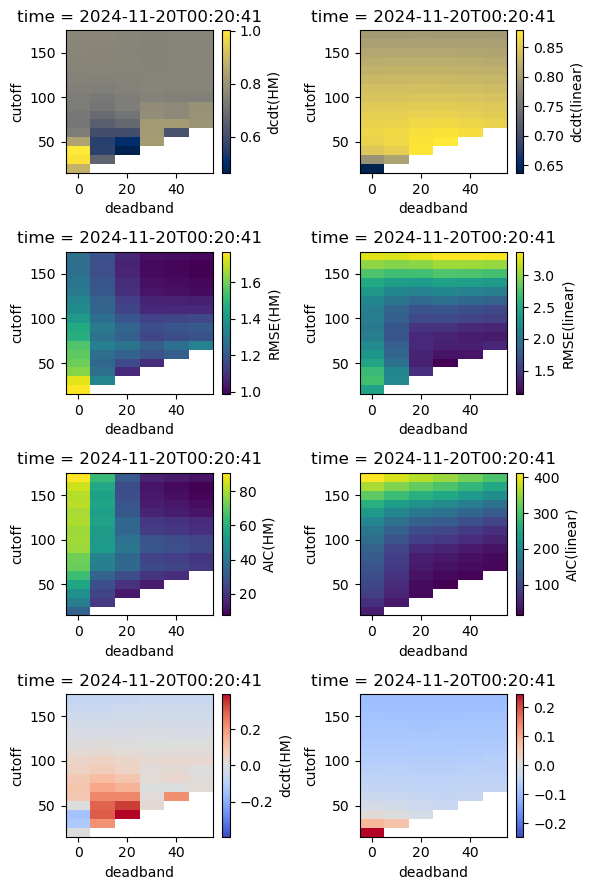

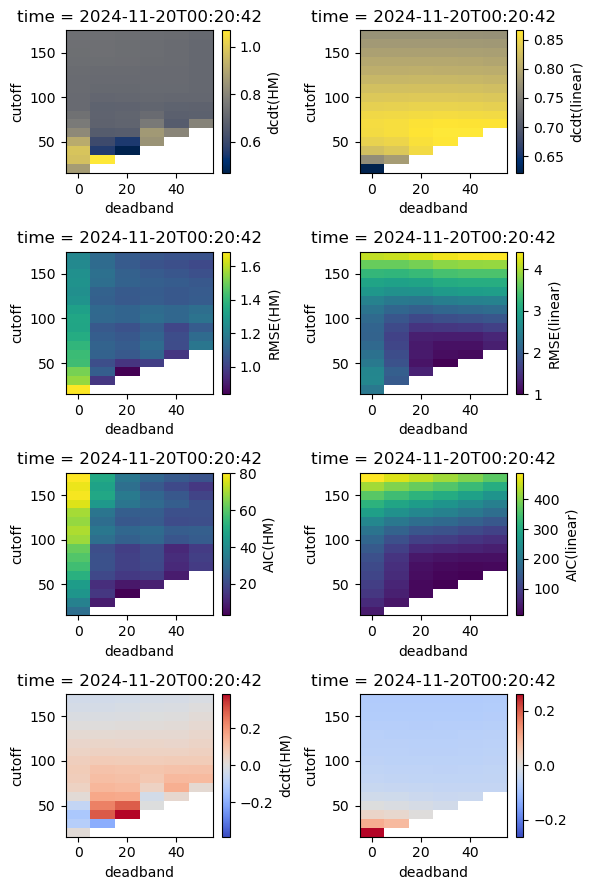

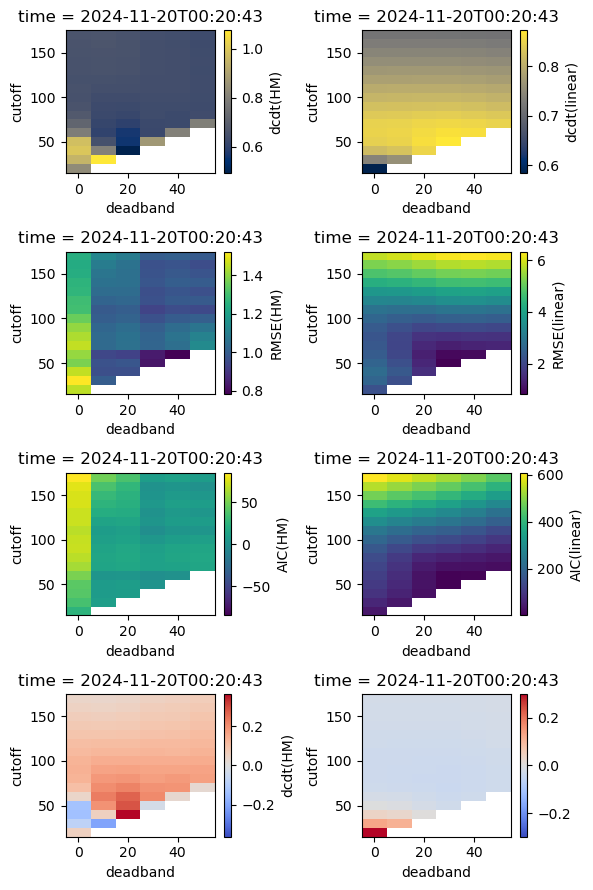

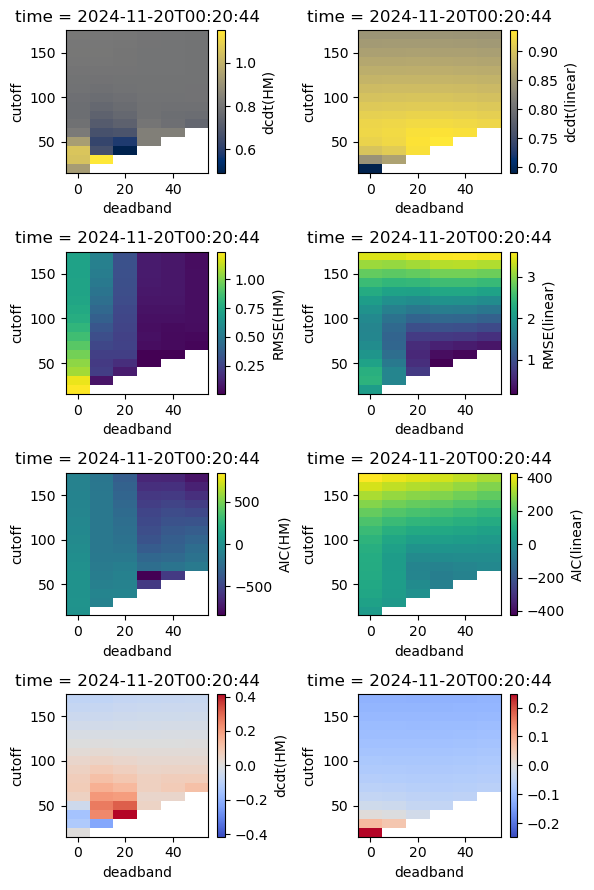

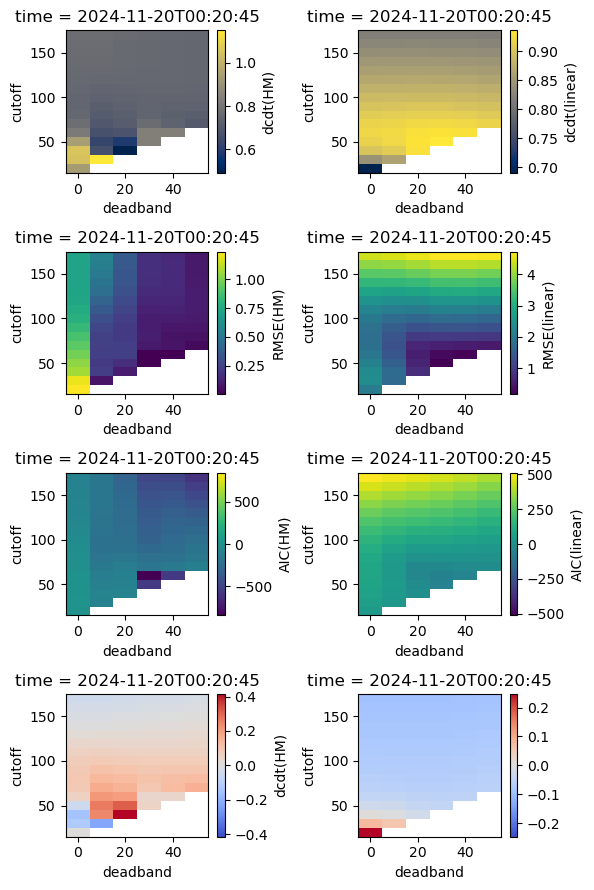

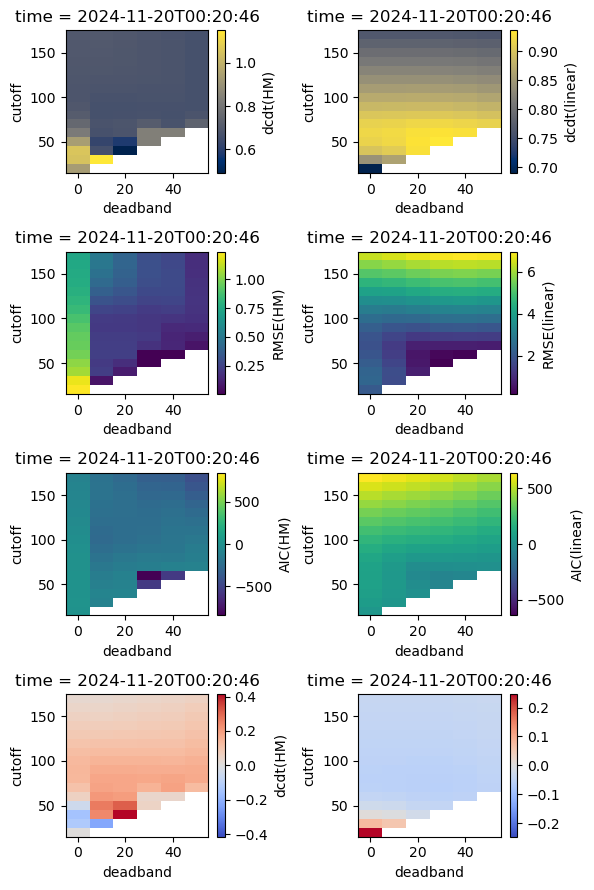

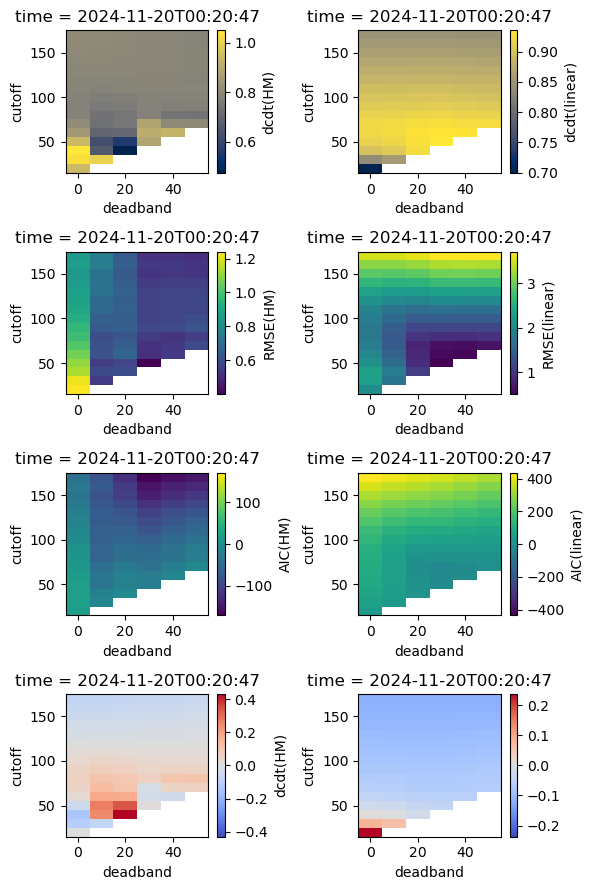

In [164]:
for time in b.time:
    fig, ax = plt.subplots(4,2, figsize=(6,9))
    b['dcdt(HM)'].sel(time=time).plot(ax=ax[0,0], cmap='cividis')
    b['dcdt(linear)'].sel(time=time).plot(ax=ax[0,1], cmap='cividis')

    b['RMSE(HM)'].sel(time=time).plot(ax=ax[1,0], cmap='viridis')
    b['RMSE(linear)'].sel(time=time).plot(ax=ax[1,1], cmap='viridis')

    b['AIC(HM)'].sel(time=time).plot(ax=ax[2,0], cmap='viridis')
    b['AIC(linear)'].sel(time=time).plot(ax=ax[2,1], cmap='viridis')

    (expected_results['dcdt(HM)'].sel(time=time)-b['dcdt(HM)'].sel(time=time)).plot(ax=ax[3,0], cmap='coolwarm')
    (expected_results['dcdt(HM)'].sel(time=time)-b['dcdt(linear)'].sel(time=time)).plot(ax=ax[3,1], cmap='coolwarm')

    # (b['dcdt(HM)']-b['dcdt(linear)']).sel(time=time).plot(ax=ax[0,2])

    fig.tight_layout()

# fig, ax = plt.sub
# b['dcdt(HM)'].isel(time=3).plot()

dict_keys(['deadband', 'cutoff', 'dcdt(HM)', 'dcdt(linear)', 'AIC(HM)', 'AIC(linear)', 'RMSE(HM)', 'RMSE(linear)'])
dict_keys(['deadband', 'cutoff', 'dcdt(HM)', 'dcdt(linear)', 'AIC(HM)', 'AIC(linear)', 'RMSE(HM)', 'RMSE(linear)'])
dict_keys(['deadband', 'cutoff', 'dcdt(HM)', 'dcdt(linear)', 'AIC(HM)', 'AIC(linear)', 'RMSE(HM)', 'RMSE(linear)'])
dict_keys(['deadband', 'cutoff', 'dcdt(HM)', 'dcdt(linear)', 'AIC(HM)', 'AIC(linear)', 'RMSE(HM)', 'RMSE(linear)'])
dict_keys(['deadband', 'cutoff', 'dcdt(HM)', 'dcdt(linear)', 'AIC(HM)', 'AIC(linear)', 'RMSE(HM)', 'RMSE(linear)'])
dict_keys(['deadband', 'cutoff', 'dcdt(HM)', 'dcdt(linear)', 'AIC(HM)', 'AIC(linear)', 'RMSE(HM)', 'RMSE(linear)'])
dict_keys(['deadband', 'cutoff', 'dcdt(HM)', 'dcdt(linear)', 'AIC(HM)', 'AIC(linear)', 'RMSE(HM)', 'RMSE(linear)'])
dict_keys(['deadband', 'cutoff', 'dcdt(HM)', 'dcdt(linear)', 'AIC(HM)', 'AIC(linear)', 'RMSE(HM)', 'RMSE(linear)'])
dict_keys(['deadband', 'cutoff', 'dcdt(HM)', 'dcdt(linear)', 'AIC(HM)', 

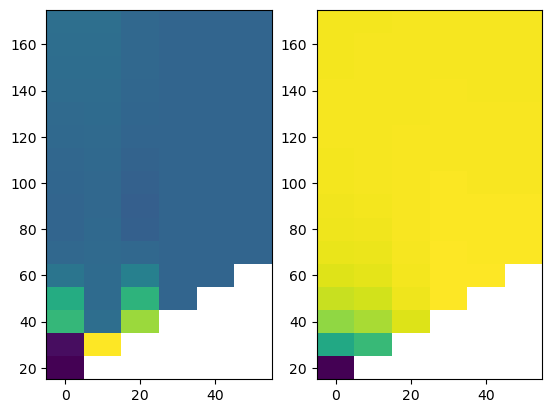

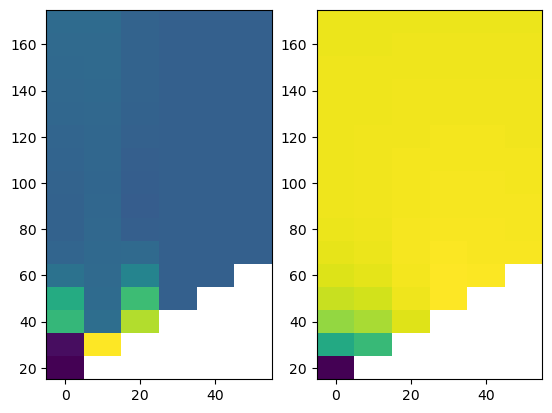

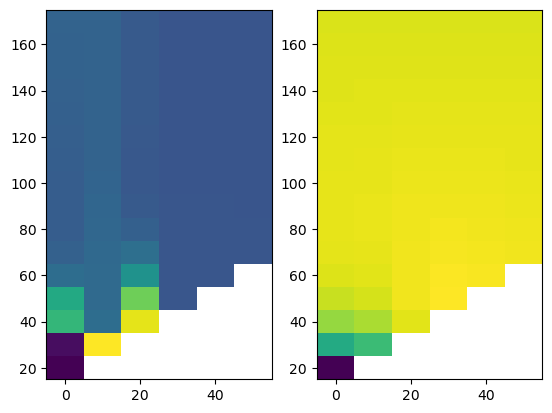

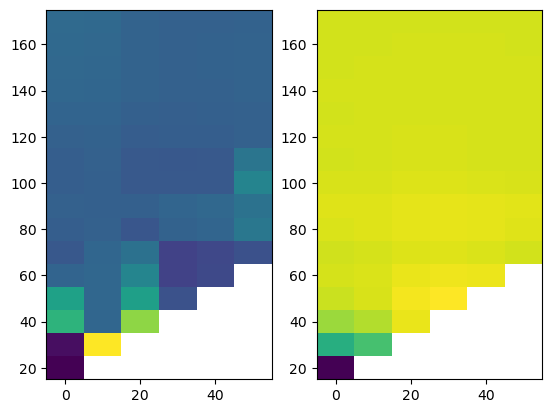

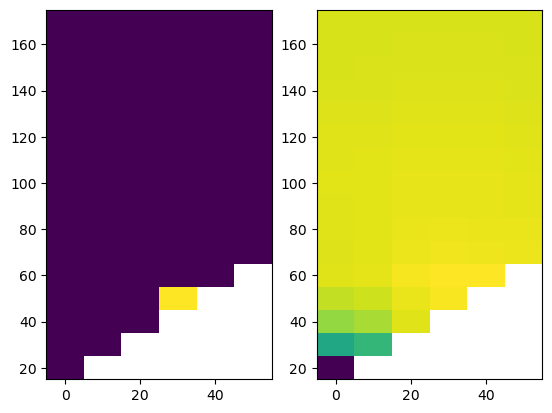

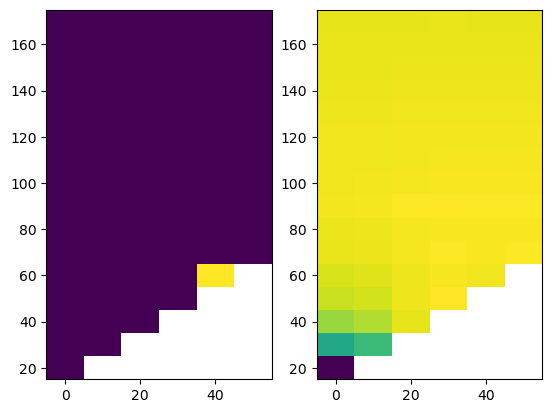

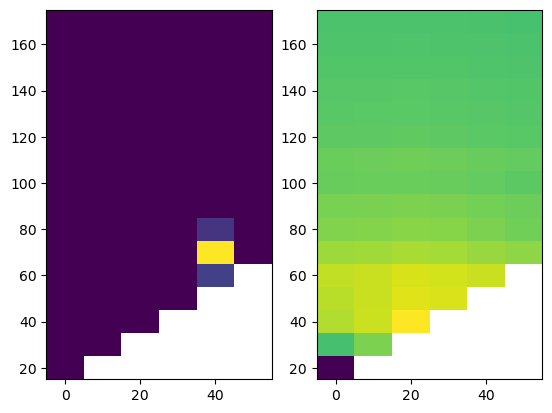

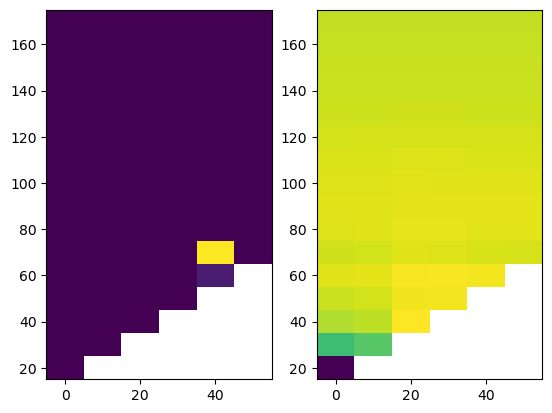

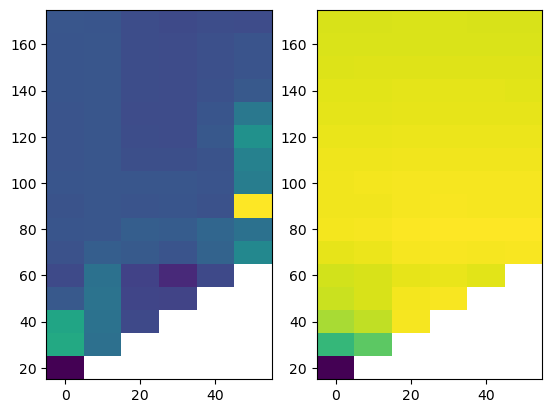

In [83]:
import matplotlib.pyplot as plt
for k in b.keys():
    print(b[k].keys())
    fig, ax = plt.subplots(1,2)
    X = b[k]['deadband']
    Y = b[k]['cutoff']
    ax[0].pcolormesh(X, Y, b[k]['dcdt(HM)'])
    ax[1].pcolormesh(X, Y, b[k]['dcdt(linear)'])

    # ax[0]